

## Sentiment Analysis with Keras and TensorFlow


In [2]:
#loading our dataset using various libraries ,using imdb data
from tensorflow.python.keras.datasets import imdb
(x_train,y_train),(x_test,y_test)= imdb.load_data(num_words=10000)
#only the most common 10k words will be used from the bag of words and rest will be ignored

In [3]:
#let's look at first example
print(x_train[0])
#this  already contains the numbers rather then words
#Unique numeric token is assigned to bag of words , so this is the list of tokens corresponding to words

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
#let's see the labels now
print(y_train[0])
#1 represents poistive review and 0 represents the negative review

1


In [5]:
#defining the class names
class_names=['Negative','Positive']

In [6]:
#this is a dictionary with key values pair
#it will show the token value corresponding to the words
word_index=imdb.get_word_index()
print(word_index['hello'])
#corresponding token of the tokenized word hello

4822


In [9]:
#Decoding the reviews
#we will make a dictionary reversing the word_index dictionary to frame the sentence using tokens value
reverse_word_index=dict((value,key) for key,value in word_index.items())
def decode(review):
    text=''
    for i in review:
        text+=reverse_word_index[i]
        text+=' '
    return text
#in the function we will pass the tokens and will get back the text sentence accoring to takenize words

In [10]:
decode(x_train[0])
#so this is the decoded text of above tokens list
#it might not be in the right sequence

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [11]:
#to check the length of various sentences
#since neural net will take fix input
def show_lengths():
    print('Length of 1st training example: ', len(x_train[0]))
    print('Length of 2nd training example: ',  len(x_train[1]))
    print('Length of 1st test example: ', len(x_test[0]))
    print('Length of 2nd test example: ',  len(x_test[1]))
    
show_lengths()

Length of 1st training example:  218
Length of 2nd training example:  189
Length of 1st test example:  68
Length of 2nd test example:  260


In [12]:
#padding is done so that to make all the sentence of same length, since neural net takes fix size input
#using meaningless words like 'the' or 'a' to make the sentence length equals , since these words won't have major effect on distinguishing the reviews from positive or negative
word_index['the']

1

In [16]:
#helper function provided by keras to do padding
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(x_train,value=word_index['the'],padding='post',maxlen=256)
#this means token value of 'the' will be added post the sentences and will make length of every sentences to 256
x_test=pad_sequences(x_test,value = word_index['the'], padding = 'post', maxlen = 256)

In [17]:
show_lengths()
#to check the length of all the sentences

Length of 1st training example:  256
Length of 2nd training example:  256
Length of 1st test example:  256
Length of 2nd test example:  256


In [18]:
#lets see the decoded first train example
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

#### Word Embeddings:

![Word Embeddings](word_embeddings.png)

#### Feature Vectors:

![Learned Embeddings](embeddings.png)


In [24]:
#one hot encoding will have features with inidividual values but the relationship between words won't be there
#but in text we have to use the relations between the various words i.e feature co-relation
#that's why we use word embeddings so that words can interpolate
#various co-relations between words are needed
#now we will create the model using word embedding layer
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D
#embedding layer can only be used as a first layer
#for feature representation we are using 16 dimensions
#GlobalAveragePlloing layer will convert the 2D output to 1D so as to pass it through dense layer
model=Sequential([
    Embedding(10000,16),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [27]:
#callback is used to not to crowd the notebook output too much
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log=LambdaCallback(on_epoch_end=lambda e,l:print(e,end='.'))
E=20
#using 20 epochs and 20 percent data for cross validation
h=model.fit(
    x_train,y_train,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_log],
    verbose = False
)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

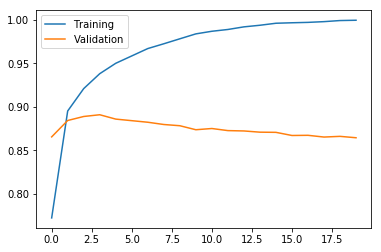

In [29]:
#we will use matplolib to plot the accuracy of model for training and validation set
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E),h.history['acc'],label='Training')
plt.plot(range(E),h.history['val_acc'],label='Validation')
plt.legend()
plt.show()
#clearly model is overfitting a bit

In [30]:
#to check how good model is doing on test data
loss, acc= model.evaluate(x_test,y_test)
print('Test set accuracy:',acc*100)

25000/25000 [==============================] - 1s 58us/step
Test set accuracy: 84.04


In [31]:
import numpy as np
#we need to expand the dimension since we are giving only first sentence of test data not whole data
p=model.predict(np.expand_dims(x_test[0],axis=0))
print(class_names[np.argmax(p[0])])

Negative


In [32]:
#let see the decoded example
decode(x_test[0])

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the